In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [2]:
data=pd.read_excel('iris (2).xls')

## Checking the basic details of data set

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [8]:
#To check null values in the dataset
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### There are no null values in data set

In [9]:
#Checking for duplicates in dataset
data.duplicated().sum()

3

In [10]:
data.drop_duplicates(inplace=True)

### The duplicates in the dataset are dropped

In [11]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

#  Exploratory Data analysis

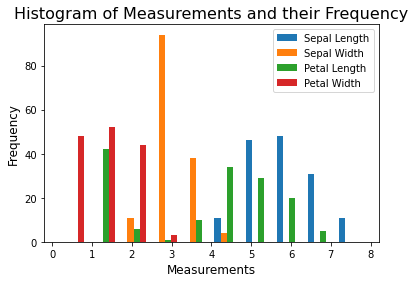

In [12]:
plt.hist([data['SL'], data['SW'], data['PL'], data['PW']])
plt.legend(['Sepal Length','Sepal Width','Petal Length','Petal Width'])
plt.xlabel('Measurements',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Measurements and their Frequency',fontsize=16)
plt.show()

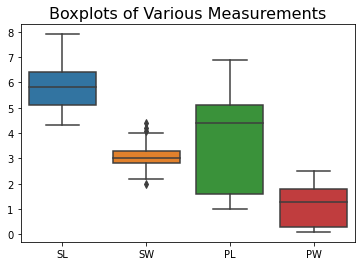

In [13]:
sns.boxplot(data=data)
plt.title('Boxplots of Various Measurements',fontsize=16)
plt.show()

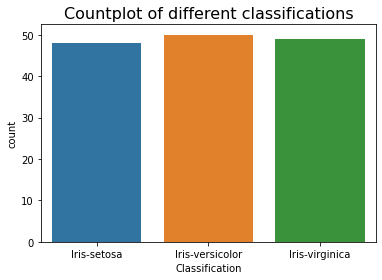

In [14]:
sns.countplot(data['Classification'])
plt.title('Countplot of different classifications',fontsize=16)
plt.show()

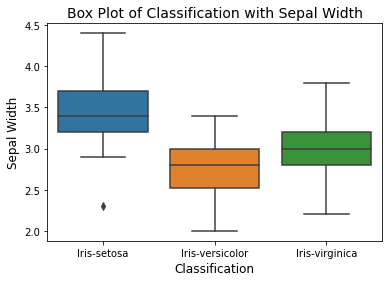

In [15]:
sns.boxplot(x='Classification',y='SW',data=data)
plt.xlabel('Classification',fontsize=12)
plt.ylabel('Sepal Width',fontsize=12)
plt.title('Box Plot of Classification with Sepal Width',fontsize=14)
plt.show()

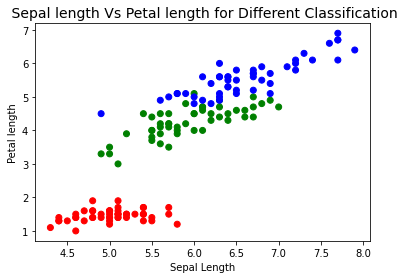

In [16]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(data['SL'], data['PL'],c=data['Classification'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Petal length')
plt.title(' Sepal length Vs Petal length for Different Classification',fontsize=14)
plt.show()

## Checking for correlation in the data

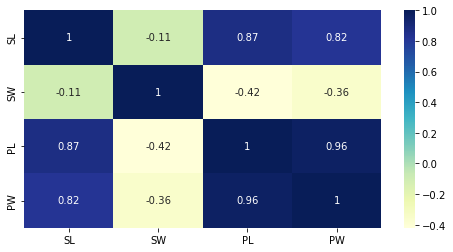

In [17]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.42,vmax=1,cmap='YlGnBu')
plt.show()

# MODEL BUILDING

In [35]:
#Dividing the dataset into Features and Target
# Classification column is taken as target (y)

In [19]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## MODEL 1 LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('The accuracy of logistic regression is',accuracy_score(y_test,y_pred_lr))

The accuracy of logistic regression is 0.9333333333333333


## MODEL 2 kNN MODEL

In [22]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]  
neighbors=range(1,20)  

In [23]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,pred_kNN) 
    metric_k.append(acc)

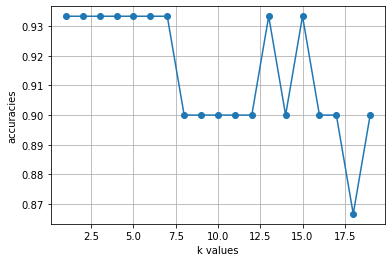

In [24]:
plt.plot(neighbors,metric_k,'o-')  
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [25]:
#Accuracy score is maximum at k=1

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9333333333333333

## MODEL 3-Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.9333333333333333

## MODEL 4-RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

## MODEL 5-SVM-Linear Kernel

In [29]:
from sklearn import svm 
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_svm1=svm_linear.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

## MODEL 6-SVM-RBF Kernel

In [30]:
accuracy_score(y_test,y_pred_svm1)
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_svm2=svm_rbf.predict(X_test)
accuracy_score(y_test,y_pred_svm2)

0.9333333333333333

## CROSS VALIDATION OF MODELS

In [31]:
from sklearn.model_selection import cross_validate

In [32]:
#For Logistic Regression
cvs_lr=cross_validate(lr,X,y,cv=10)
print('The cv score for Logistic regression model is',cvs_lr['test_score'].mean())
#For kNN
cvs_knn=cross_validate(knn,X,y,cv=10)
print('The cv score for kNN  model is',cvs_knn['test_score'].mean())
#For Decision Tree
cvs_dt=cross_validate(dt,X,y,cv=10)
print('The cv score for Decision Tree Classifier is',cvs_dt['test_score'].mean())
#For Random Forest Classifier
cvs_rf=cross_validate(rf,X,y,cv=10)
print('The cv score for Random Forest Classifier is',cvs_rf['test_score'].mean())
#For SVM classifier
cvs_svm_linear=cross_validate(svm_linear,X,y,cv=10)
print('The cv score for Support vector machine Classifier (linear) is',cvs_svm_linear['test_score'].mean())
cvs_svm_rbf=cross_validate(svm_rbf,X,y,cv=10)
print('The cv score for Support vector machine Classifier (rbf) is',cvs_svm_rbf['test_score'].mean())

The cv score for Logistic regression model is 0.9733333333333334
The cv score for kNN  model is 0.96
The cv score for Decision Tree Classifier is 0.9528571428571428
The cv score for Random Forest Classifier is 0.96
The cv score for Support vector machine Classifier (linear) is 0.9733333333333334
The cv score for Support vector machine Classifier (rbf) is 0.9661904761904762


### So Best Model is Support Vector Machine classifier-Linear (SVM-Linear) after comparing CV scores and accuracy scores

### Saving the data set as a csv file to feed into spyder environment

In [33]:
data.set_index('SL', inplace=True)

In [34]:
data.to_csv('iris_svm1.csv')

***
***